# Recognizing CIFAR-10 images with deep learning 

CIFAR-10 classification is a common benchmark problem in machine learning. The CIFAR-10 dataset contains 60,000 color images of 32×32 pixels in 3 channels, divided in 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets provides 10,000 images.The class labels and their standard associated integer values are listed below.

0: airplane

1: automobile

2: bird

3: cat

4: deer

5: dog

6: frog

7: horse

8: ship

9: truck

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

Convolutional Neural Networks (ConvNets or CNNs) are a category of Neural Networks that have proven very effective in areas such as image recognition and classification. There are four main operations in the ConvNet shown in Figure below:
![alt text](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png?w=748)

**Convolution** - ConvNets derive their name from the “convolution” operator. The primary purpose of Convolution in case of a ConvNet is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data. 

**Non Linearity (ReLU)** -ReLU is an element wise operation (applied per pixel) and replaces all negative pixel values in the feature map by zero. The purpose of ReLU is to introduce non-linearity in ConvNet

**Pooling or Sub Sampling** - Spatial Pooling (also called subsampling or downsampling) reduces the dimensionality of each feature map but retains the most important information. Spatial Pooling can be of different types: Max, Average, Sum etc

**Classification (Fully Connected Layer)** - The Fully Connected layer is a traditional Multi Layer Perceptron that uses a softmax activation function in the output layer (other classifiers like SVM can also be used, but will stick to softmax in this post). The term “Fully Connected” implies that every neuron in the previous layer is connected to every neuron on the next layer. 
These operations are the basic building blocks of every Convolutional Neural Network

The Convolution + Pooling layers act as Feature Extractors from the input image while Fully Connected layer acts as a classifier.

# Import required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
from matplotlib import pyplot
import sys
import numpy as np

# Instantiate variables

In [ ]:
EPOCHS=100 # one epoch is when an entire dataset is passed forward and backward through the neural network only once.
NUM_CLASSES = 10 # Number of output categories
BATCH_SIZE = 128 # Number of images to process in a batch

# Load & pre process dataset


Loads the cifar 10 dataset.

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
# First input image in train test
x_train[0]

In [ ]:
# First output image in train test
y_train[0]


This converts type to 32 bit float

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Here, the training and testing data is being normalized by scaling it within a range of 0 and 1 as every value lies between 0-255

In [ ]:
#normalize 
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

There are 10 classes and these classes are represented as unique integers.

We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value. We can achieve this with the to_categorical() utility function.

In [ ]:
#one-hot encoding
y_train =  tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test =  tf.keras.utils.to_categorical(y_test,NUM_CLASSES)

In [ ]:
#shape of x, y
print(x_train.shape)
print(y_train.shape)

In [ ]:
y_train[0]

# Develop the baseline architecture


We will now create the baseline architecture of our model. First, we’ll instantiate the Sequential API and assign it to model – this is like the foundation of our model.

Next, it’s time to stack a few layers. Firstly, we’ll use three convolutional blocks – In this case, the related layer that is applied every time is a MaxPooling2D one directly after the Conv2D layer.Each time, the numer of feature maps increases – from 32, to 64, to 128. This is done because the model then learns a limited number of “generic” patterns (32) and a high amount of patterns unique to the image (128). Max Pooling ensures translation invariance.

After the convolutional blocks, we add a Flatten layer. The Dense layers, which are responsible for generating the actual classifications, only work with one-dimensional data. Flatten makes this happen: it converts the multidimensional feature maps into one-dimensional shape.

Dense layers ensure that classification is possible. As you can see, in terms of the number of outputs per layer, we create an information bottleneck that eventually converges in no_classes – thus 10 – outputs, exactly the number of unique classes in our dataset. As we’re using the Softmax activation function, we’ll get a discrete multiclass probability distribution as our output for any input. From this distribution, we can draw the one with the highest value, which is the most likely class for our input.





We have a first convolutional stage with rectified linear unit (ReLU) activations
followed by a batch normalization. Our net will learn 32 convolutional filters, each one of
which with a size of 3x3.since Convolution2D is the first stage of our pipeline, we
are also required to define its input_shape.

Rectified linear activations (ReLU) — activation function defined by

f(x) = max(0,x)

It returns 0 for all values below 0 and value itself for anything > 0. It’s much simpler in computation.

# Base Model - Let's call it our vanilla model with single block of 32 filters


In [ ]:
# define cnn model
def base_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	return model

#Improvising model with additional blocks

One way to improve the performance is to define a deeper network with multiple
convolutional operations.

## Model with 2 blocks of 32 & 64 filters

In [ ]:
# define cnn model
def define_model_with_2_blocks():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	return model

## Model with 3 blocks - 32, 64 & 128 filters

In [ ]:
# define cnn model
def define_model_with_3_blocks():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    return model

# Improvising with dropout regularization
To prevent overfitting we will dropout i.e. dropping out units (both hidden and visible) in a neural network.
Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. 

By “ignoring”, We mean these units are not considered during a particular forward or backward pass.
More technically, At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left; incoming and outgoing edges to a dropped-out node are also removed.
For more on dropout, see the post:

[A Gentle Introduction to Dropout for Regularizing Deep Neural Networks](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/).
Variation of Dropout Regularization using a pattern of increasing dropout from 20% for the first block, 30% for the second block, and so on to 50% at the fully connected layer in the classifier part of the model is effective as it forces layers deep in the model to regularize more than layers closer to the input.

In [ ]:
# define cnn model
def model_with_dropout():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	return model

# Improvising with batch normalization

[Batch normalization](https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/) is a technique designed to automatically standardize the inputs to a layer in a deep learning neural network.

Local Response Normalization (LRN) layer implements the lateral inhibition.This layer is useful when we are dealing with ReLU neurons because ReLU neurons have unbounded activations and we need LRN to normalize that. We want to detect high frequency features with a large response. If we normalize around the local neighborhood of the excited neuron, it becomes even more sensitive as compared to its neighbors.

At the same time, it will dampen the responses that are uniformly large in any given local neighborhood. If all the values are large, then normalizing those values will diminish all of them. So basically we want to encourage some kind of inhibition and boost the neurons with relatively larger activations.

Note here we have used varied dropout rates.

In [ ]:
# define cnn model
def model_with_batch_normalization():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	return model

# Compile the model
The model will be optimized using Root mean square (RMSprop)
and will optimize the categorical cross entropy loss function required for multi-class classification and will monitor classification accuracy.
Note that categorical crossentropy requires our data to be categorical, which was achieved during data preprocessing with to_categorical i.e. one-hot encoding of target vectors.

In [ ]:
#compile the model and specify the settings such as loss function , optimizer and accuracy metrics
def compile_model(model):
  model.compile(loss='categorical_crossentropy', 
            optimizer='RMSprop', 
            metrics=['accuracy'])
  return model

# Fit and Evaluate model
Once the model is compiled, we do have a model, but it’s not yet trained. We can start the training process by calling model.fit, which fits our data (in this case our training data and the corresponding targets) and specifies some settings for our training process, ones that we configured before.

Here we also evaluate the model

In [ ]:
def fit_model(model):
#train
    batch_size = 64
    history = model.fit(x_train, y_train, batch_size=batch_size,
        epochs=EPOCHS, validation_data=(x_test,y_test)) 
    score = model.evaluate(x_test, y_test,
                      batch_size=BATCH_SIZE)
    print("\nTest score:", score[0])
    print('Test accuracy:', score[1])
    return history

# Visualize the results

We assigned the results of model.fit to a history object. This will allow us to see the testing results as well as generate nice plots of the training process.

In [ ]:
# Visualize history
# plot diagnostic learning curves
import time
def summarize_diagnostics(history):
	# plot loss
	  pyplot.figure(figsize=(12,10))
	  pyplot.subplot(211)
	  pyplot.title('Cross Entropy Loss')
	  pyplot.plot(history.history['loss'], color='blue', label='train')
	  pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	  pyplot.subplot(212)
	  pyplot.title('Classification Accuracy')
	  pyplot.plot(history.history['accuracy'], color='blue', label='train')
	  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	  pyplot.subplots_adjust(bottom=0.5, right=0.8, top=0.9, wspace=0.9, hspace=0.9)
	# save plot to file
	  timestr = time.strftime("%Y%m%d-%H%M%S")
	  pyplot.savefig(timestr + '_plot.png')
	  pyplot.show()
	  pyplot.close()

# Save model function

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

def save_model(model,modelfile_name):
  # serialize model to JSON
    model_json = model.to_json()
    with open(F"/content/gdrive/My Drive/"+modelfile_name, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(F"/content/gdrive/My Drive/"+ modelfile_name+".h5")
    print("Saved model to disk")

Mounted at /content/gdrive


# Load Model Function

In [ ]:
from keras.models import model_from_json
def load_model(model_name):
  # load json and create model
  json_file = open(F"/content/gdrive/My Drive/"+model_name, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights(model_name+".h5")
  print("Loaded model from disk")

# Evaluating base model
Your specific results may vary given the stochastic nature of the learning algorithm.



In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
from matplotlib import pyplot
import sys
model = base_model()
compiled = compile_model(model)
history = fit_model(compiled)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.3539 - accuracy: 0.5335 - val_loss: 1.1776 - val_accuracy: 0.5986
Epoch 2/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.8682 - accuracy: 0.6993 - val_loss: 1.1922 - val_accuracy: 0.6060
Epoch 3/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.6434 - accuracy: 0.7764 - val_loss: 1.0168 - val_accuracy: 0.6752
Epoch 4/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.4544 - accuracy: 0.8458 - val_loss: 1.1040 - val_accuracy: 0.6838
Epoch 5/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.2981 - accuracy: 0.8990 - val_loss: 1.3228 - val_accuracy: 0.6614
Epoch 6/100
50000/50000 [==============================] - 4s 87us/step - loss: 0.1882 - accuracy: 0.9365 - val_loss: 1.5387 - val_accuracy: 0.6629
Epoch 7/100
50000/50000 [==============================] - 4

In [ ]:
save_model(model,"model")


Saved model to disk


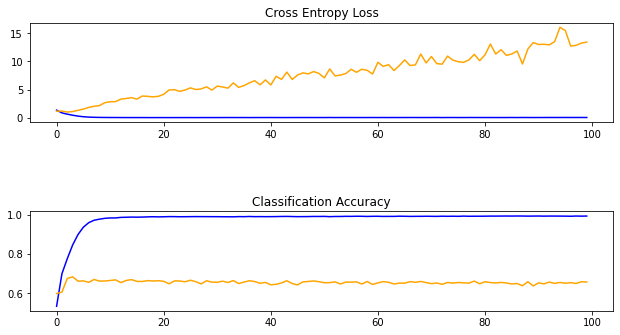

In [ ]:
summarize_diagnostics(history)

In this case model has achieved the classification accuracy of **65.7%** and model rapidly overfits the test dataset. 

# Executing model with 2 blocks
Your specific results may vary given the stochastic nature of the learning algorithm.



In [ ]:
model1 = define_model_with_2_blocks()
compiled1 = compile_model(model1)
history1 = fit_model(compiled1)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 113us/step - loss: 1.3858 - accuracy: 0.5184 - val_loss: 1.2619 - val_accuracy: 0.5762
Epoch 2/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.8848 - accuracy: 0.6926 - val_loss: 1.0548 - val_accuracy: 0.6481
Epoch 3/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.6712 - accuracy: 0.7693 - val_loss: 0.8679 - val_accuracy: 0.7126
Epoch 4/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.5123 - accuracy: 0.8240 - val_loss: 0.8248 - val_accuracy: 0.7282
Epoch 5/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.3924 - accuracy: 0.8658 - val_loss: 1.2600 - val_accuracy: 0.6676
Epoch 6/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.3004 - accuracy: 0.8976 - val_loss: 1.0765 - val_accuracy: 0.7331
Epoch 7/100
50000/50000 [==============================]

In [ ]:
save_model(model1,"model1")

Saved model to disk


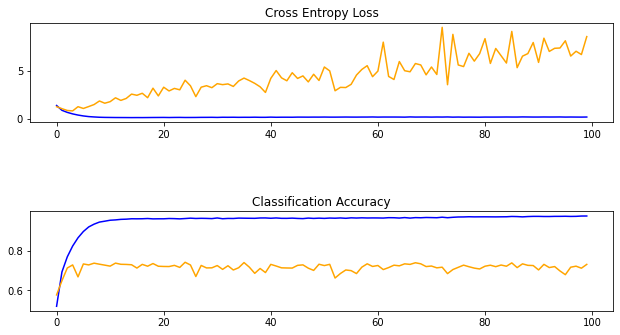

In [ ]:
summarize_diagnostics(history1)

# Executing model with 3 blocks
Your specific results may vary given the stochastic nature of the learning algorithm.



In [ ]:
model2 = define_model_with_3_blocks()
compiled2 = compile_model(model2)
history2 = fit_model(compiled2)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 129us/step - loss: 1.5019 - accuracy: 0.4682 - val_loss: 1.1155 - val_accuracy: 0.5963
Epoch 2/100
50000/50000 [==============================] - 7s 130us/step - loss: 0.9614 - accuracy: 0.6632 - val_loss: 0.9202 - val_accuracy: 0.6853
Epoch 3/100
50000/50000 [==============================] - 6s 129us/step - loss: 0.7380 - accuracy: 0.7436 - val_loss: 1.0035 - val_accuracy: 0.6820
Epoch 4/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.6043 - accuracy: 0.7900 - val_loss: 0.8133 - val_accuracy: 0.7302
Epoch 5/100
50000/50000 [==============================] - 6s 125us/step - loss: 0.5032 - accuracy: 0.8267 - val_loss: 0.8568 - val_accuracy: 0.7411
Epoch 6/100
50000/50000 [==============================] - 6s 124us/step - loss: 0.4238 - accuracy: 0.8532 - val_loss: 0.8454 - val_accuracy: 0.7579
Epoch 7/100
50000/50000 [==============================]

In [ ]:
save_model(model2,"model2")

Saved model to disk


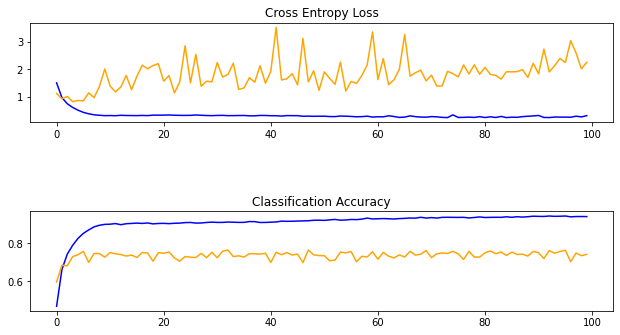

In [ ]:
summarize_diagnostics(history2)

Test accuracy achieved is **74.23**%. 

The results of the model on the test dataset showed an improvement in classification accuracy with each increase in the depth of the model. It is possible that this trend would continue if models with four and five layers were evaluated, and this might make an interesting extension. Nevertheless, all three models showed the same pattern of dramatic overfitting 

The results also suggest that the model is good starting point but is in need of regularization to address the rapid overfitting of the test dataset. More generally, the results suggest that it may be useful to investigate techniques that slow down the convergence (rate of learning) of the model. This may include techniques such as data augmentation as well as learning rate schedules, changes to the batch size, and perhaps more.

# Executing Model with dropout
Your specific results may vary given the stochastic nature of the learning algorithm.



In [ ]:
model3 = model_with_dropout()
compiled3 = compile_model(model3)
history3 = fit_model(compiled3)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.6498 - accuracy: 0.4156 - val_loss: 1.2309 - val_accuracy: 0.5615
Epoch 2/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.1238 - accuracy: 0.6048 - val_loss: 1.1764 - val_accuracy: 0.6172
Epoch 3/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.9403 - accuracy: 0.6713 - val_loss: 0.8464 - val_accuracy: 0.7027
Epoch 4/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.8470 - accuracy: 0.7077 - val_loss: 0.7917 - val_accuracy: 0.7250
Epoch 5/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.8012 - accuracy: 0.7240 - val_loss: 0.9510 - val_accuracy: 0.6683
Epoch 6/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.7651 - accuracy: 0.7401 - val_loss: 0.7321 - val_accuracy: 0.7590
Epoch 7/100
50000/50000 [==============================]

Changing the optimizer to sdg

In [ ]:

from keras.optimizers import SGD
model31 = model_with_dropout()
opt = SGD(lr=0.001, momentum=0.9)
model31.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history31 = fit_model(model31)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 158us/step - loss: 2.0079 - accuracy: 0.2646 - val_loss: 1.6658 - val_accuracy: 0.4088
Epoch 2/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.6251 - accuracy: 0.4031 - val_loss: 1.4690 - val_accuracy: 0.4688
Epoch 3/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.4729 - accuracy: 0.4620 - val_loss: 1.3451 - val_accuracy: 0.5067
Epoch 4/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.3682 - accuracy: 0.5026 - val_loss: 1.2750 - val_accuracy: 0.5430
Epoch 5/100
50000/50000 [==============================] - 8s 151us/step - loss: 1.2796 - accuracy: 0.5384 - val_loss: 1.1415 - val_accuracy: 0.5960
Epoch 6/100
50000/50000 [==============================] - 8s 151us/step - loss: 1.2068 - accuracy: 0.5655 - val_loss: 1.0717 - val_accuracy: 0.6166
Epoch 7/100
50000/50000 [==============================]

In [ ]:
save_model(model31,"model31")

Saved model to disk


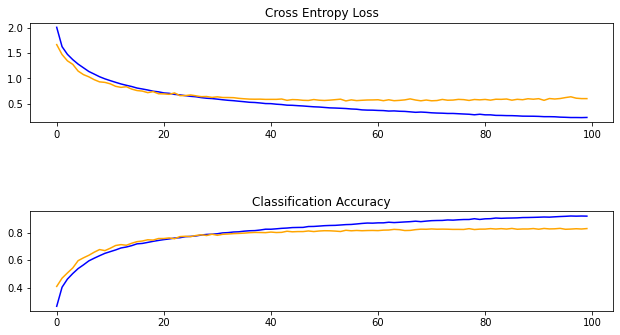

In [ ]:
summarize_diagnostics(history31)

Reviewing the learning curve for the model, we can see that overfitting has been addressed. The model converges well for about 40 or 50 epochs, at which point there is no further improvement on the test dataset.

This is a great result. We could elaborate upon this model and add early stopping with a patience of about 10 epochs to save a well-performing model on the test set during training at around the point that no further improvements are observed.

# Executing model with Batch Normalization

Batch normalization increses the learnability hence to offset this acceleration, we can increase the regularization by changing the dropout from a fixed pattern to an increasing pattern.
Your specific results may vary given the stochastic nature of the learning algorithm.

In [ ]:
model4 = model_with_batch_normalization()
compiled4 = compile_model(model4)
history4 = fit_model(compiled4)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 18s 351us/step - loss: 1.5829 - accuracy: 0.4587 - val_loss: 1.0634 - val_accuracy: 0.6195
Epoch 2/100
50000/50000 [==============================] - 16s 325us/step - loss: 1.0112 - accuracy: 0.6466 - val_loss: 0.8824 - val_accuracy: 0.6944
Epoch 3/100
50000/50000 [==============================] - 16s 324us/step - loss: 0.8303 - accuracy: 0.7102 - val_loss: 0.7729 - val_accuracy: 0.7304
Epoch 4/100
50000/50000 [==============================] - 16s 323us/step - loss: 0.7368 - accuracy: 0.7460 - val_loss: 0.6675 - val_accuracy: 0.7683
Epoch 5/100
50000/50000 [==============================] - 16s 323us/step - loss: 0.6644 - accuracy: 0.7714 - val_loss: 0.6120 - val_accuracy: 0.7919
Epoch 6/100
50000/50000 [==============================] - 16s 322us/step - loss: 0.6148 - accuracy: 0.7891 - val_loss: 0.5659 - val_accuracy: 0.8024
Epoch 7/100
50000/50000 [=========================

In [ ]:
save_model(model4,"model4")

Saved model to disk


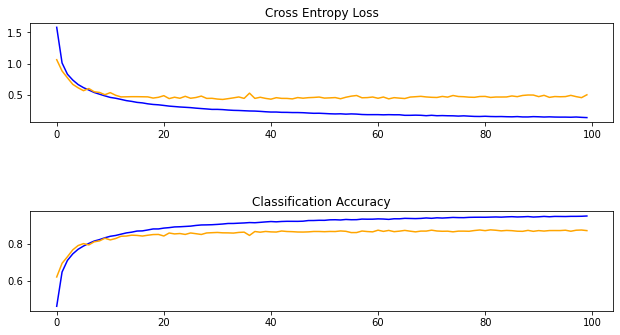

In [ ]:
summarize_diagnostics(history4)

In this case, we can see that as we would have hoped, using both regularization techniques together has resulted in a further lift in model performance on the test set. 

# Improving the CIFAR-10 performance with data augmentation.
Another way to improve the performance is to generate more images for our
training. 

Data augmentation involves making copies of the examples in the training dataset with small random modifications.

This has a regularizing effect as it both expands the training dataset and allows the model to learn the same general features, although in a more generalized manner.

There are many types of data augmentation that could be applied. Given that the dataset is comprised of small photos of objects, we do not want to use augmentation that distorts the images too much, so that useful features in the images can be preserved and used.

The idea here is that we can take the standard CIFAR training set and
augment this set with multiple types of transformation, including rotation, rescaling,
horizontal or vertical flip, zooming, channel shift, and many more. 
Your specific results may vary given the stochastic nature of the learning algorithm.



In [ ]:
#image augmentation - rotation_range is a value in degrees (0-180) for randomly rotating pictures; width_shift and height_shift are ranges for randomly translating pictures vertically or
#horizontally; zoom_range is for randomly zooming pictures; horizontal_flip is for randomly flipping half of the images horizontally; and fill_mode is the strategy
#used for filling in new pixels that can appear after a rotation or a shift
model5 = model_with_batch_normalization()
compiled5 = compile_model(model5)
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    )
datagen.fit(x_train)

Using the same CNN
defined before, we simply generate more augmented images and then we train.
For efficiency, the generator runs in parallel to the model. This allows image
augmentation on a CPU while training in parallel on a GPU

In [ ]:
#train
batch_size = 128
history5 = compiled5.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=int(x_train.shape[0] / 64),
                    epochs=50,
                    verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
781/781 [==============================] - 56s 71ms/step - loss: 0.5276 - accuracy: 0.8217 - val_loss: 0.4516 - val_accuracy: 0.8598
Epoch 2/50
781/781 [==============================] - 56s 71ms/step - loss: 0.5251 - accuracy: 0.8219 - val_loss: 0.4503 - val_accuracy: 0.8589
Epoch 3/50
781/781 [==============================] - 55s 71ms/step - loss: 0.5124 - accuracy: 0.8275 - val_loss: 0.4535 - val_accuracy: 0.8603
Epoch 4/50
781/781 [==============================] - 55s 71ms/step - loss: 0.5168 - accuracy: 0.8264 - val_loss: 0.4571 - val_accuracy: 0.8592
Epoch 5/50
781/781 [==============================] - 55s 71ms/step - loss: 0.5095 - accuracy: 0.8290 - val_loss: 0.4703 - val_accuracy: 0.8559
Epoch 6/50
781/781 [==============================] - 55s 71ms/step - loss: 0.5065 - accuracy: 0.8292 - val_loss: 0.5082 - val_accuracy: 0.8426
Epoch 7/50
781/781 [==============================] - 55s 71ms/step - loss: 0.5035 - accuracy: 0.8292 - val_loss: 0.4462 - val_accuracy:

Save the model to disk

In [ ]:
#save to disk
save_model(model5,"model5")

Saved model to disk


Evaluate the model

In [ ]:
#test
scores = model5.evaluate(x_test, y_test, batch_size=64, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0])) 

10000/10000 [==============================] - 1s 109us/step

Test result: 87.320 loss: 0.418


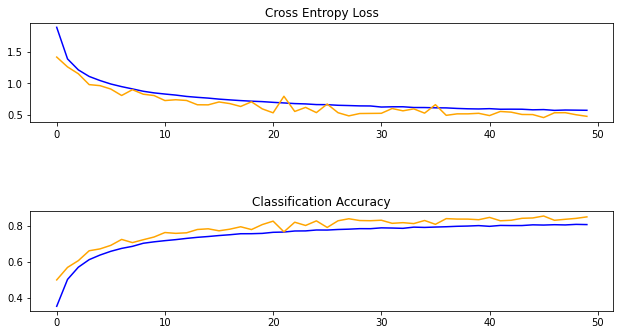

In [ ]:
summarize_diagnostics(history5)

Each iteration is now more expensive because we have more training data.
Therefore, We have run for 50 iterations only. We see that by doing this we reach
an accuracy of 87.4%

# Discussion

We explored multiple approaches designed to expand upon changes to the baseline model

Run the model for different combinations and provide summary of results for below . 

**Note that  Your specific results may vary given the stochastic nature of the learning algorithm.**


**Baseline alone**

**Baseline + 2 blocks**

**Baseline + 3 blocks**

**Baseline + 3 blocks + Increasing Dropout**

**Baseline + 3 blocks + Increasing Dropout + Batch normalization**

**Baseline + 3 blocks + Increasing Dropout + Batch normalization+ Data Augmentation**

The model is now learning well and we have good control over the rate of learning without overfitting.

So far, we have not tuned the hyperparameters of the learning algorithm, such as the learning rate, which is perhaps the most important hyperparameter. We may expect further improvements with adaptive changes to the learning rate, such as use of an adaptive learning rate technique such as Adam. These types of changes may help to refine the model once converged.

# References
 
*   https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
*   https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/
 
*   https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c
*   https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5
 
*   https://www.machinecurve.com/index.php/2020/01/08/how-does-the-softmax-activation-function-work/
*   https://prateekvjoshi.com/2016/04/05/what-is-local-response-normalization-in-convolutional-neural-networks/
 
*   https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

*   https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/


